In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_csv=pd.read_csv(city_data_to_load)
ride_csv=pd.read_csv(ride_data_to_load)

In [57]:
combined_data=pd.merge(ride_csv,city_csv,how="left", on=["city","city"])
combined_data.head(20)

## Bubble Plot of Ride Sharing Data

In [4]:
#group the data by city type
city_type=combined_data.groupby('city')

In [5]:
#create a Series that links each city with their respective city type
city_types_test=city_csv.set_index('city')['type']

#THE INDEX IS NOT RIGHT, FIGURE OUT HOW TO SYNC the TWO INDEXS

In [6]:
#create series that holds each city's average fair

In [7]:
city_avg_fare=combined_data.groupby('city')['fare'].mean()

In [8]:
driver_count_per=city_csv.set_index('city')['driver_count']

In [58]:
#find total rides per city type

#create Dataframe to hold the series you created above
#Dataframe holds how total rides per city
total_rides_per_city=pd.DataFrame(city_type['ride_id'].count())
#rename the column
total_rides_per_city=total_rides_per_city.rename({'ride_id':'total rides'}, axis=1)
total_rides_per_city.head()
#create new column to hold each city's type
total_rides_per_city['Type']=city_types_test
#create new column to hold each city's average fare
total_rides_per_city['Total Fare']=combined_data.groupby('city')['fare'].sum()
total_rides_per_city['Avg Fare']=city_avg_fare.astype(int)
total_rides_per_city['Driver Count']=driver_count_per
total_rides_per_city.head()

,total rides,Type,Total Fare,Avg Fare,Driver Count
city,,,,,
Amandaburgh,18,Urban,443.55,24,12
Barajasview,22,Urban,557.31,25,26
Barronchester,16,Suburban,582.76,36,11
Bethanyland,18,Suburban,593.21,32,22
Bradshawfurt,10,Rural,400.64,40,7


In [10]:
urbanData=total_rides_per_city.loc[total_rides_per_city['Type']=='Urban']
subData=total_rides_per_city.loc[total_rides_per_city['Type']=='Suburban']
ruralData=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural']

In [47]:
company_colors=["xkcd:Coral pink", "xkcd:sky blue", "Gold"]

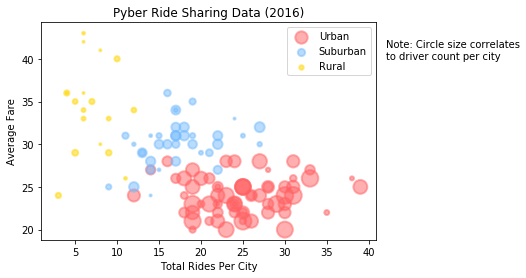

In [46]:
# create the x,y data for each city type
urbanData=total_rides_per_city.loc[total_rides_per_city['Type']=='Urban']
subData=total_rides_per_city.loc[total_rides_per_city['Type']=='Suburban']
ruralData=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural']


# Build the scatter plots for each city types

plt.scatter(x=urbanData['total rides'],y=urbanData['Avg Fare'],
            s=urbanData['Driver Count']*4,c='xkcd:Coral pink',alpha=.5,linewidths=2)

plt.scatter(x=subData['total rides'],y=subData['Avg Fare'],
            s=subData['Driver Count']*4,c='xkcd:sky blue',alpha=.5, linewidths=2)

plt.scatter(x=ruralData['total rides'],y=ruralData['Avg Fare'],
            s=ruralData['Driver Count']*4,c='Gold',alpha=.5, linewidths=2)

# Incorporate the other graph properties
plt.xlabel('Total Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data (2016)')
# Create a legend
plt.legend(['Urban','Suburban','Rural'])
# Incorporate a text label regarding circle size
plt.text(x=42, y=40, s='Note: Circle size correlates' +'\n'+ 'to driver count per city')
# Save Figure
plt.savefig('pyber_ride_sharing_data2016.pdf')
# Show plot
plt.show()

In [59]:
total_rides_per_city.head(5)

,total rides,Type,Total Fare,Avg Fare,Driver Count
city,,,,,
Amandaburgh,18,Urban,443.55,24,12
Barajasview,22,Urban,557.31,25,26
Barronchester,16,Suburban,582.76,36,11
Bethanyland,18,Suburban,593.21,32,22
Bradshawfurt,10,Rural,400.64,40,7


## Total Fares by City Type

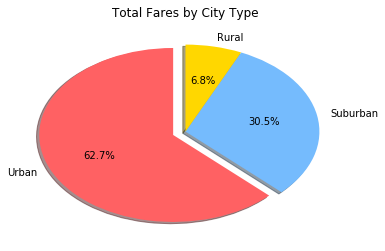

In [60]:
# Calculate Type Percents
totalFares=totalFare_byCity.sum()
urbanPerc=(total_rides_per_city.loc[total_rides_per_city['Type']=='Urban', 'Total Fare'].sum())/totalFares
subPerc=(total_rides_per_city.loc[total_rides_per_city['Type']=='Suburban', 'Total Fare'].sum())/totalFares
ruralPerc=(total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Total Fare'].sum())/totalFares
# Build Pie Chart
plt.pie([urbanPerc,subPerc,ruralPerc],explode=(.1,0,0),labels=["Urban", "Suburban", "Rural"],
        autopct="%1.1f%%", shadow=True, colors=company_colors, startangle=90)
plt.title("Total Fares by City Type")
# Save Figure
plt.savefig("Total_Fares_By_City_Type.pdf")
# Show Figure
plt.show()

## Total Rides by City Type

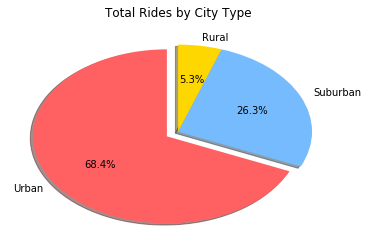

In [52]:
# Calculate Ride Percents
totalRides=total_rides_per_city["total rides"].sum()
urbanRides=(total_rides_per_city.loc[total_rides_per_city['Type']=='Urban', 'total rides'].sum())/totalRides
subRides=(total_rides_per_city.loc[total_rides_per_city['Type']=='Suburban', 'total rides'].sum())/totalRides
ruralRides=(total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'total rides'].sum())/totalRides
# Build Pie Chart
plt.pie([urbanRides,subRides,ruralRides],explode=(.1,0,0),labels=["Urban", "Suburban", "Rural"],
        autopct="%1.1f%%", shadow=True, colors=company_colors, startangle=90)
plt.title("Total Rides by City Type")
# Save Figure
plt.savefig("Total_Rides_by_City.pdf")
# Show Figure
plt.show()

In [37]:
total_rides_per_city.head(5)

,total rides,Type,Avg Fare,Driver Count
city,,,,
Amandaburgh,18,Urban,24,12
Barajasview,22,Urban,25,26
Barronchester,16,Suburban,36,11
Bethanyland,18,Suburban,32,22
Bradshawfurt,10,Rural,40,7


## Total Drivers by City Type

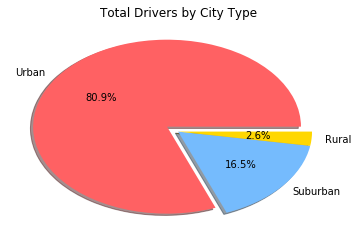

In [50]:
# Calculate Driver Percents
totalDrivers=total_rides_per_city["Driver Count"].sum()
urbanDrivers=(total_rides_per_city.loc[total_rides_per_city['Type']=='Urban', 'Driver Count'].sum())/totalDrivers
subDrivers=(total_rides_per_city.loc[total_rides_per_city['Type']=='Suburban', 'Driver Count'].sum())/totalDrivers
ruralDrivers=(total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Driver Count'].sum())/totalDrivers
# Build Pie Charts
plt.pie([urbanDrivers,subDrivers,ruralDrivers],explode=(.1,0,0),labels=["Urban", "Suburban", "Rural"],
        autopct="%1.1f%%", shadow=True, colors=company_colors)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("Total_Drivers_by_City.pdf")
# Show Figure
plt.show()

In [65]:
RURALDRIVE=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Driver Count'].sum()
RURALFARE=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Total Fare'].sum()
RURALFARE/RURALDRIVE
RURALDRIVE=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Driver Count'].sum()
RURALFARE=total_rides_per_city.loc[total_rides_per_city['Type']=='Rural', 'Total Fare'].sum()

55.48628205128205